In [ ]:
!sudo apt-get install openjdk-7-jdk 
!sudo apt-get install python-dev
!sudo pip3 install konlpy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package openjdk-7-jdk is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Package 'openjdk-7-jdk' has no installation candidate
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-dev is already the newest version (2.7.15~rc1-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!sudo pip3 install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get update- qq
!apt-get install fonts-nanum* -qq

E: Invalid operation update-


In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic Eco


Text(0.5, 1.0, '안녕')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45397 missing from current font.
  font.set_text(s, 0, flags=flags)


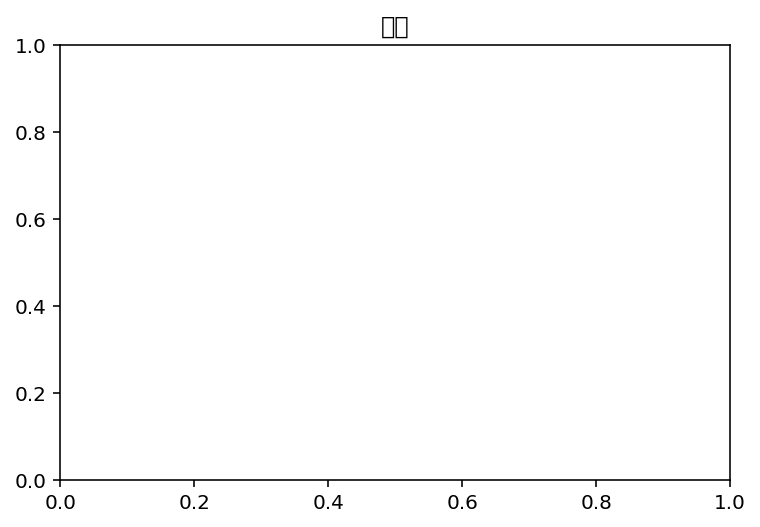

In [ ]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

plt.title('안녕')

In [ ]:
import re
import os
import nltk
from konlpy.tag import Okt, Komoran, Hannanum, Kkma

In [ ]:
komoran = Komoran()
hannanum = Hannanum()
kkma = Kkma()
okt = Okt()

In [ ]:
import os
from konlpy.tag import Okt
from collections import Counter

# Okt 형태소 분석 객체 생성
ok_twitter = Okt()

# 저장된 파일의 위치 탐색 후, file변수에 저장
file = open('/content/drive/MyDrive/dataset/text/KakaoTalk_yhj_group.txt','r',encoding='utf-8')
total_lines = file.readlines() # txt파일을 줄 단위로 읽음
file.close()
print(total_lines)

# 크롤링 댓글파일 가져와서 reply_text 리스트에 저장
reply_text = []
for line in total_lines:
  reply_text.append(line[:-1])

# 형태소 분류하고 확인 하기
sentences_tag = []
for sentence in reply_text:
  morph = ok_twitter.pos(sentence)
  sentences_tag.append(morph)

# 명사만 출력해 보기
'''
for my_sentence in sentences_tag:
	for word, tag in my_sentence:
		if tag in ['Noun']:
			print(word)
'''

# 필요한 품사만 추출해보기(명사를 bucket list에 담기)
stopwords = ['오후','오전','사진','이모티콘']
bucket_list = []
for my_sentence in sentences_tag:
    for word, tag in my_sentence:
        if tag in ['Noun'] and len(word)>1 and (word not in stopwords):
            bucket_list.append(word)
        
# 단어 빈도수 구하기
# 각 원소의 출현 횟수를 계산하는 Counter 모듈을 활용한다.
from collections import Counter
counts = Counter(bucket_list)



# 명사 빈도 순서대로 상위 30개 출력
print(counts.most_common(30))

# 명사와 형용사를 모두 추출하고 상위 50개를 출력
bucket_list_2 = []
for my_sentence in sentences_tag:
  for word, tag in my_sentence:
    if tag in ['Noun','Adjective']:
      bucket_list_2.append(word)
counts = Counter(bucket_list)
print(counts.most_common(50))

['공모전 도전팀 님과 카카오톡 대화\n', '저장한 날짜 : 2022-06-21 00:40:12\n', '\n', '--------------- 2022년 5월 27일 금요일 ---------------\n', '나건주님이 이하경님, 이하경님, 유병훈님을 초대하였습니다.\n', '나건주님이 팀채팅을 시작했어요!\n', '팀채팅방에서 주고 받은 대화와 미디어는 실시간 보관되고, 나중에 참여한 멤버도 함께 볼 수 있습니다.\n', '[나건주] [오후 11:58] 안녕하십니까\n', '[유병훈] [오후 11:59] 젊은이들 할할할 안녕\n', '[유병훈] [오후 11:59] ㅋㅋㅋㅋㅋㅋㅋ\n', '--------------- 2022년 5월 28일 토요일 ---------------\n', '[나건주] [오전 12:00] 일단 예선 통과해야 분석도 하겠네여\n', '[유병훈] [오전 12:00] 분석기간\n', '[유병훈] [오전 12:00] 1달이나주는거보면\n', '[유병훈] [오전 12:00] 어렵나본대\n', '[유병훈] [오전 12:00] ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ\n', '[이하경] [오전 12:01] 할\n', '[이하경] [오전 12:01] 안녕하세요\n', '[나건주] [오전 12:02] 병훈이형도 3일 방학이면\n', '[나건주] [오전 12:02] 그주 주말에 얘기좀 할까용\n', '[이하경] [오전 12:03] 좋아요!!\n', '[유병훈] [오전 12:03] 6월 4일\n', '[유병훈] [오전 12:03] 5일\n', '[유병훈] [오전 12:03] 다 괜찮긴함 현재로선\n', '[유병훈] [오전 12:03] 학회 모임끝나고\n', '[유병훈] [오전 12:03] 해도되고\n', '[나건주] [오전 12:04] 45일은 상관없음\n', '[이하경] [오전 12:04] 저도 둘다 가능합니다\n', '[이하경] [오전 12:04] 비대면일까요 대면일까요\n', '[나건주] [오전 12:04] 그것도 상관없음\n', '[유병훈] [오전 12:05] 다

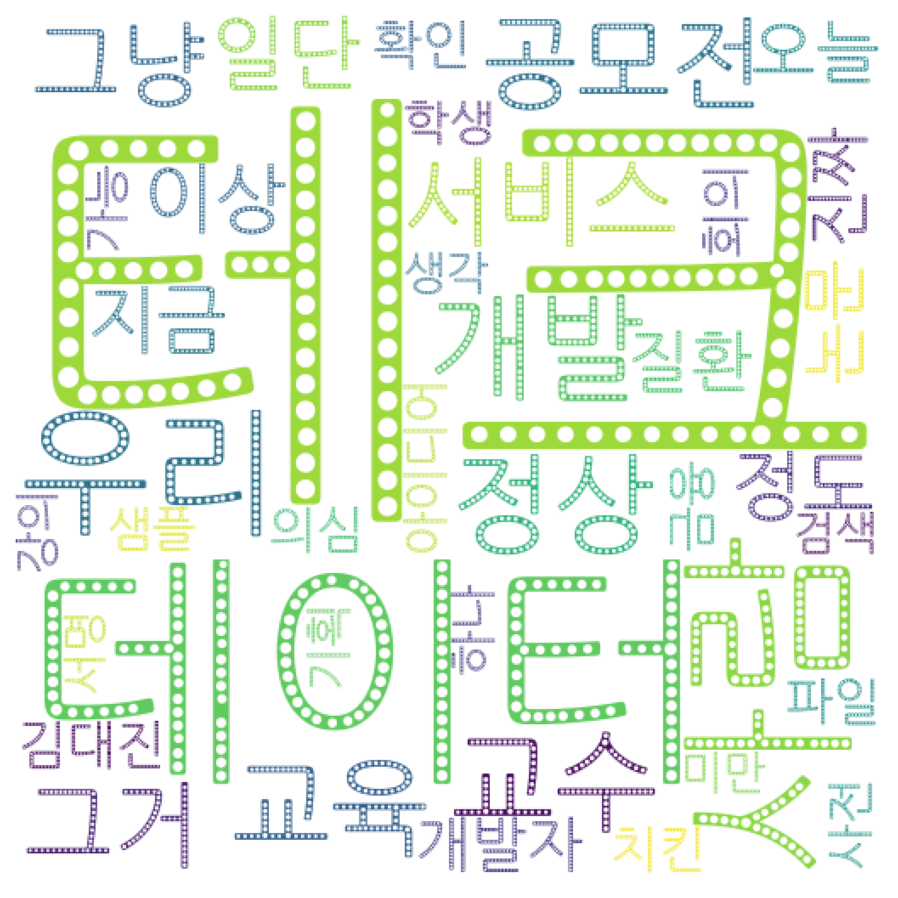

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(font_path = path,
                    background_color = 'white',
                    width=512, height=512,
                    max_font_size=500,
                    max_words=40)
wc.generate_from_frequencies(counts)

plt.figure(figsize=(16,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

# Save to png
wc.to_file('/content/drive/MyDrive/dataset/text/finggle_word.jpg')


In [ ]:
!pip install stylecloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 262 kB 5.3 MB/s 
     |████████████████████████████████| 161 kB 47.2 MB/s 
     |████████████████████████████████| 87 kB 6.6 MB/s 
     |████████████████████████████████| 87 kB 6.6 MB/s 
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259508 sha256=7ed9c36209d05db45dcc12037e1c9735db8932284682f37ea2896a27663d99ab
  Stored in directory: /root/.cache/pip/wheels/77/42/7a/f52b5f84c04196fd4c2a3dceeb1bbeaee1c93a4fe271b5eb41
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=d2de33666dbcf1fc80f0bd715d45fcccf7295e1697dfdec29fdf6a9d50a2b008
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
  Created wheel for tinycss: filename=tinycss-0.4-py3-none-any.whl size=43955 sha256=bff2f1af490476d7b50b06dd86d4b7e89db6ce466325a8e3ab8a2f14e2af246b


In [ ]:
import stylecloud

In [ ]:
stylecloud.gen_stylecloud(text=counts,
                          icon_name="fab fa-twitter",
                          palette="colorbrewer.diverging.Spectral_11",
                          background_color='black',
                          gradient="horizontal",
                          font_path=path,
                          output_name="/content/drive/MyDrive/dataset/text/finggle_analysis.jpg")

In [ ]:
'''
- file_path: 입력할 데이터를 텍스트 문서로 지정합니다.
- text: 입력할 데이터를 딕셔너리 자료형으로 지정합니다.
- font_path: 워드클라우드를 그릴 path를 지정합니다.
- size: 사이즈를 지정, (1024, 512)과 같은 형식으로 입력합니다.
- background_color: 배경색을 지정한다. 색이름을 입력하면 된다. ( 예) white )
- icon_name: 어떤 모양으로 그릴 지 입력합니다. fab fa-twitter(트워터 모양), fas fa-dog(강아지), fas fa-flag(깃발), fas fa-fish(물고기) 등이 있다. 띄어쓰기 앞은 폰트를 의미하고, 뒤에는 모양을 의미한다. 그릴 수 있는 모양은 가지수가 좀 많은데, stylecolud패키지가 설치된 폴더에서 static폴더 밑에 fontawesome.min.css파일을 확인하면 알 수 있다.
- font_path: 폰트를 지정한다.
- output_name: 결과를 파일로 저장한다.
'''

'\n- file_path: 입력할 데이터를 텍스트 문서로 지정합니다.\n- text: 입력할 데이터를 딕셔너리 자료형으로 지정합니다.\n- font_path: 워드클라우드를 그릴 path를 지정합니다.\n- size: 사이즈를 지정, (1024, 512)과 같은 형식으로 입력합니다.\n- background_color: 배경색을 지정한다. 색이름을 입력하면 된다. ( 예) white )\n- icon_name: 어떤 모양으로 그릴 지 입력합니다. fab fa-twitter(트워터 모양), fas fa-dog(강아지), fas fa-flag(깃발), fas fa-fish(물고기) 등이 있다. 띄어쓰기 앞은 폰트를 의미하고, 뒤에는 모양을 의미한다. 그릴 수 있는 모양은 가지수가 좀 많은데, stylecolud패키지가 설치된 폴더에서 static폴더 밑에 fontawesome.min.css파일을 확인하면 알 수 있다.\n- font_path: 폰트를 지정한다.\n- output_name: 결과를 파일로 저장한다.\n'